In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [01:18<00:00, 31.4MB/s]

Extracting files...


Path to dataset files: /Users/giuliasaresini/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [10]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import seaborn as sns

In [1]:
import os
import cv2
import numpy as np

labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            try:
                # Carica e ridimensiona l'immagine
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Ridimensiona l'immagine
                
                # Aggiungi immagine e etichetta come una coppia
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Errore nel caricamento dell'immagine {img}: {e}")
    
    # Converti la lista in un array NumPy
    data = np.array(data, dtype=object)  # Usa dtype=object per consentire la combinazione immagine-etichetta
    return data

# Carica i dati
train_data = get_training_data('/Users/giuliasaresini/Documents/tesi_vs/Medicine/Progetto/chest_xray/train')
test_data = get_training_data('/Users/giuliasaresini/Documents/tesi_vs/Medicine/Progetto/chest_xray/test')
val_data = get_training_data('/Users/giuliasaresini/Documents/tesi_vs/Medicine/Progetto/chest_xray/val')


In [18]:
print(train_data.shape, val_data.shape )

(5216, 2) (16, 2)


# LET'S SEE IF THE CLASS ARE BALANCED OR NOT

In [3]:
import pandas as pd

# Supponiamo che 'train_data' contenga i dati con etichette già assegnate
l = []
for i in train_data:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")

# Creare un DataFrame con pandas
df = pd.DataFrame(l, columns=['Class'])

# Calcolare la frequenza di ciascuna classe
class_counts = df['Class'].value_counts()

# Stampare la frequenza delle classi
print("Frequenza delle classi nel training set:")
print(class_counts)


Frequenza delle classi nel training set:
Class
Pneumonia    3875
Normal       1341
Name: count, dtype: int64


Abbiamo classi sbilanciate, quindi applichiamo tecniche di data augmentation

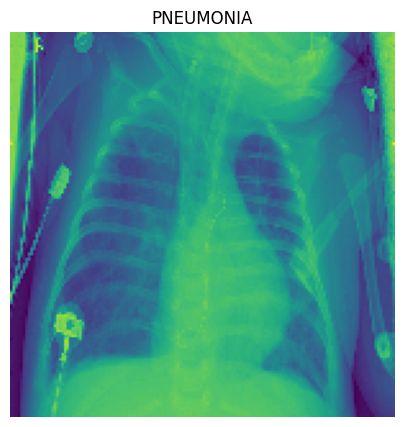

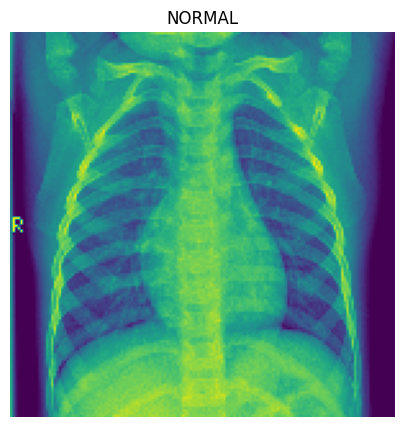

In [4]:
import matplotlib.pyplot as plt

# Visualizza la prima immagine
plt.figure(figsize=(5, 5))
plt.imshow(train_data[0][0])  # Assicurati che il formato sia RGB
plt.title(labels[train_data[0][1]])
plt.axis('off')  # Disabilita gli assi per una visualizzazione pulita
plt.show()

# Visualizza l'ultima immagine
plt.figure(figsize=(5, 5))
plt.imshow(train_data[-1][0])  # Assicurati che il formato sia RGB
plt.title(labels[train_data[-1][1]])
plt.axis('off')  # Disabilita gli assi per una visualizzazione pulita
plt.show()


In [2]:
import numpy as np
import cv2

# Funzione per normalizzare le immagini
def normalize_images(data):
    images = []
    labels = []
    
    for img, label in data:
        # Normalizzazione: ogni pixel viene diviso per 255
        normalized_img = img / 255.0
        images.append(normalized_img)
        labels.append(label)
    
    # Converti le immagini e le etichette in array separati
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

# Normalizza le immagini nel dataset di addestramento
train_images_pre, train_labels_pre = normalize_images(train_data)
val_images, val_labels = normalize_images(val_data)
test_images, test_labels = normalize_images(test_data)

# Verifica la forma e un esempio dei dati normalizzati
print(f"Shape of normalized train images: {train_images_pre.shape}")

Shape of normalized train images: (5216, 150, 150)


# Splitting training into validation and training

# HERE IS THE SPLITTING RATEB

In [3]:
from sklearn.model_selection import train_test_split

# Dividiamo il dataset in un training set (80%) e validation set (20%)
train_images, val_images, train_labels, val_labels = train_test_split(train_images_pre, train_labels_pre, test_size=0.2, random_state=42)

# Verifica la forma e un esempio dei dati divisi
print(f"Shape of training images: {train_images.shape}")
print(f"Shape of validation images: {val_images.shape}")

Shape of training images: (4172, 150, 150)
Shape of validation images: (1044, 150, 150)


In [42]:
import pandas as pd

# Supponiamo che 'train_labels' contenga le etichette (0 e 1)
prova_l = []
for label in train_labels:
    if label == 0:
        prova_l.append("Pneumonia")
    else:
        prova_l.append("Normal")

# Creare un DataFrame con pandas
df = pd.DataFrame(prova_l, columns=['Class'])

# Calcolare la frequenza di ciascuna classe
class_counts = df['Class'].value_counts()

# Stampare la frequenza delle classi
print("Frequenza delle classi nel training set:")
print(class_counts)


Frequenza delle classi nel training set:
Class
Pneumonia    3122
Normal       1050
Name: count, dtype: int64


In [27]:
train_labels.shape

(4172,)

In [28]:
import pandas as pd

# Supponiamo che 'train_labels' contenga le etichette (0 e 1)
prova = []
for label in train_labels:
    if label == 0:
        prova.append("Pneumonia")
    else:
        prova.append("Normal")

# Creare un DataFrame con pandas
df = pd.DataFrame(prova, columns=['Class'])

# Calcolare la frequenza di ciascuna classe
class_counts = df['Class'].value_counts()

# Stampare la frequenza delle classi
print("Frequenza delle classi nel training set:")
print(class_counts)


Frequenza delle classi nel training set:
Class
Pneumonia    3122
Normal       1050
Name: count, dtype: int64


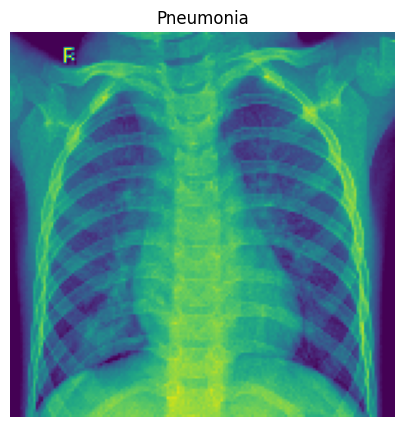

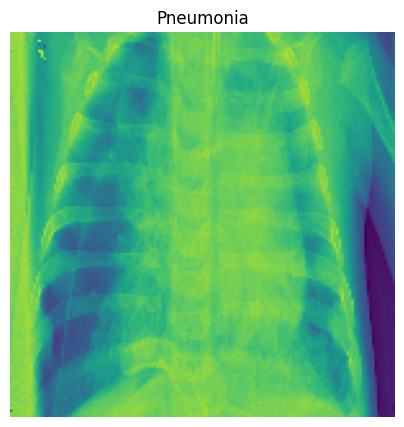

In [43]:
# Separiamo le immagini e le etichette

# Visualizzare la prima immagine
plt.figure(figsize=(5, 5))
plt.imshow(train_images[0])  # La prima immagine
plt.title('Pneumonia' if train_labels[0] == 0 else 'Normal')  # Impostare il titolo in base all'etichetta
plt.axis('off')  # Per non mostrare gli assi
plt.show()

# Visualizzare l'ultima immagine
plt.figure(figsize=(5, 5))
plt.imshow(train_images[-1])  # L'ultima immagine
plt.title('Pneumonia' if train_labels[-1] == 0 else 'Normal')  # Impostare il titolo in base all'etichetta
plt.axis('off')  # Per non mostrare gli assi
plt.show()

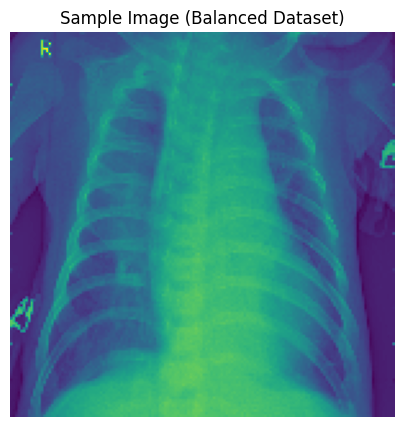

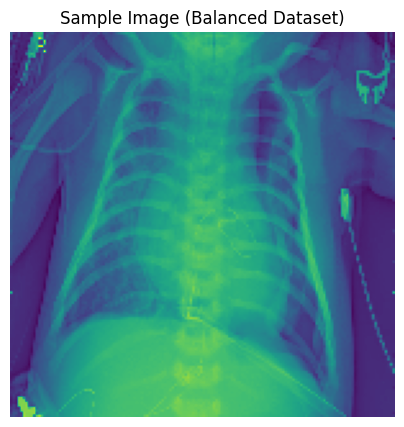

Numero di immagini Pneumonia: 3122
Numero di immagini Normal (originali + augmentate): 3122
Numero totale di immagini nel dataset bilanciato: 6244


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

# Identificare le immagini delle classi "Normal" e "Pneumonia"
normal_images = train_images[train_labels == 1]  # Solo le immagini "Normal"
normal_labels = train_labels[train_labels == 1]  # Etichette corrispondenti
pneumonia_images = train_images[train_labels == 0]  # Solo le immagini "Pneumonia"
pneumonia_labels = train_labels[train_labels == 0]  # Etichette corrispondenti

# Aggiungere una dimensione per il canale (1 per immagini in scala di grigio)
normal_images = np.expand_dims(normal_images, axis=-1)
pneumonia_images = np.expand_dims(pneumonia_images, axis=-1)

# Determinare il numero di immagini target per bilanciare il dataset
target_normal_images_count = pneumonia_images.shape[0] 
current_normal_images_count = normal_images.shape[0]
images_to_generate = target_normal_images_count - current_normal_images_count

# Creare un ImageDataGenerator per l'augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generare le immagini aumentate per bilanciare il dataset
augmented_normal_images = []
if images_to_generate > 0:
    augmented_data_gen = datagen.flow(normal_images, normal_labels, batch_size=32, shuffle=False)
    for _ in range(images_to_generate // 32 + 1):
        batch_images, _ = next(augmented_data_gen)
        augmented_normal_images.append(batch_images)

    # Concatenare tutte le immagini generate
    augmented_normal_images = np.vstack(augmented_normal_images)[:images_to_generate]
else:
    augmented_normal_images = np.empty((0, *normal_images.shape[1:]))

# Concatenare le immagini originali e quelle aumentate per la classe "Normal"
balanced_normal_images = np.concatenate([normal_images, augmented_normal_images])
balanced_normal_labels = np.full(balanced_normal_images.shape[0], 1)

# Creare il dataset finale bilanciato
augmented_train_images = np.concatenate([pneumonia_images, balanced_normal_images])
augmented_train_labels = np.concatenate([pneumonia_labels, balanced_normal_labels])

# Mescolare il dataset in modo casuale
augmented_train_images, augmented_train_labels = shuffle(augmented_train_images, augmented_train_labels)

# Visualizzare alcune immagini per conferma
plt.figure(figsize=(5, 5))
plt.imshow(augmented_train_images[0].reshape(150, 150))
plt.title('Sample Image (Balanced Dataset)')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(augmented_train_images[-1].reshape(150, 150))
plt.title('Sample Image (Balanced Dataset)')
plt.axis('off')
plt.show()

# Verifica del bilanciamento
print("Numero di immagini Pneumonia:", pneumonia_images.shape[0])
print("Numero di immagini Normal (originali + augmentate):", balanced_normal_images.shape[0])
print("Numero totale di immagini nel dataset bilanciato:", augmented_train_images.shape[0])

In [5]:
augmented_train_images.shape

(6244, 150, 150, 1)

In [6]:
augmented_train_images

array([[[[0.05882353],
         [0.0627451 ],
         [0.04705882],
         ...,
         [0.12156863],
         [0.09411765],
         [0.04705882]],

        [[0.05490196],
         [0.03921569],
         [0.12941176],
         ...,
         [0.12156863],
         [0.11764706],
         [0.05490196]],

        [[0.03137255],
         [0.10980392],
         [0.15686275],
         ...,
         [0.1254902 ],
         [0.10980392],
         [0.05098039]],

        ...,

        [[0.06666667],
         [0.04313725],
         [0.04313725],
         ...,
         [0.09019608],
         [0.09019608],
         [0.08627451]],

        [[0.0627451 ],
         [0.05098039],
         [0.0745098 ],
         ...,
         [0.09019608],
         [0.09019608],
         [0.09019608]],

        [[0.05882353],
         [0.03921569],
         [0.10588235],
         ...,
         [0.09019608],
         [0.09019608],
         [0.09019608]]],


       [[[0.21568627],
         [0.2       ],
         [0.2 

In [8]:
val_images

array([[[0.        , 0.        , 0.        , ..., 0.01568627,
         0.01176471, 0.01960784],
        [0.        , 0.        , 0.        , ..., 0.01176471,
         0.01176471, 0.01176471],
        [0.        , 0.        , 0.        , ..., 0.01176471,
         0.01176471, 0.01960784],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.18823529, 0.20392157, 0.21568627, ..., 0.11372549,
         0.20392157, 0.29411765],
        [0.18823529, 0.20392157, 0.20392157, ..., 0.12156863,
         0.2       , 0.25490196],
        [0.18823529, 0.2       , 0.21176471, ..., 0.12156863,
         0.09803922, 0.21568627],
        ...,
        [0.01568627, 0.03529412, 0.18039216, ..., 0.08235294,
         0.08235294, 0.07843137],
        [0.0

In [9]:
val_images.shape

(1044, 150, 150)

# ORA DEVO NORMALIZZARE LE IMMAGINI AUMENTATE

# BEFORE PERFORMING NORMALIZATION ON AUGMENTED DATA CHECK IF THEY ARE ALREDY NORMALIZED


In [31]:
#augmented_train_images_normalized = augmented_train_images / 255.0

In [10]:
import numpy as np

# Aggiungere un canale per immagini in scala di grigi
val_images.shape
val_images = np.expand_dims(val_images, axis=-1)  # Diventa (16, 150, 150, 1)
val_images.shape

(1044, 150, 150, 1)